# Training v1 - 2019-10-16 15:00:00 - Naive Deep Learning

In [43]:
# load in data

import pandas as pd
import pickle

with open('data/gdsc.pkl', 'rb') as f:
    gdsc1 = pickle.load(f)
    gdsc1_drugdata = pickle.load(f)
    gdsc2 = pickle.load(f)
    gdsc2_drugdata = pickle.load(f)

with open('data/ccle_expression.pkl', 'rb') as f:
    gene_entrez = pickle.load(f)
    ccle = pickle.load(f)

with open('data/ccle_sample_info.pkl', 'rb') as f:
    ccle_sample_info = pickle.load(f)

with open('data/preprocessed/processed_data1.pkl', 'rb') as f:
    xtrain = pickle.load(f)
    ylabel = pickle.load(f)
    ylabel_binary = pickle.load(f)
    index_to_sanger = pickle.load(f)

palbo = gdsc1.loc[gdsc1['DRUG_NAME'] == 'Palbociclib']
ln_ic50 = palbo['LN_IC50']
celllines = palbo['SANGER_MODEL_ID']

In [49]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(len(gene_entrez)-1,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
validation_size = 300

x_val = xtrain[:validation_size]
partial_x_train = xtrain[validation_size:]

y_val = ylabel_binary[:validation_size]
partial_y_train = ylabel_binary[validation_size:]

In [55]:
history = model.fit(partial_x_train,partial_y_train,
epochs=20,
batch_size=16,
validation_data=(x_val, y_val))

Epoch 1/20
22/22 [==============================] - 0s 16ms/step - loss: 0.2024 - accuracy: 0.9235 - val_loss: 0.3437 - val_accuracy: 0.8900
Epoch 2/20
22/22 [==============================] - 0s 11ms/step - loss: 0.2519 - accuracy: 0.8588 - val_loss: 0.5225 - val_accuracy: 0.8800
Epoch 3/20
22/22 [==============================] - 0s 11ms/step - loss: 0.1962 - accuracy: 0.9029 - val_loss: 0.3874 - val_accuracy: 0.8900
Epoch 4/20
22/22 [==============================] - 0s 12ms/step - loss: 0.1955 - accuracy: 0.9147 - val_loss: 0.5011 - val_accuracy: 0.8800
Epoch 5/20
22/22 [==============================] - 0s 10ms/step - loss: 0.2209 - accuracy: 0.8912 - val_loss: 0.5640 - val_accuracy: 0.8800
Epoch 6/20
22/22 [==============================] - 0s 10ms/step - loss: 0.1579 - accuracy: 0.9500 - val_loss: 0.6990 - val_accuracy: 0.8767
Epoch 7/20
22/22 [==============================] - 0s 10ms/step - loss: 0.2224 - accuracy: 0.9088 - val_loss: 0.3535 - val_accuracy: 0.8967
Epoch 8/20
22

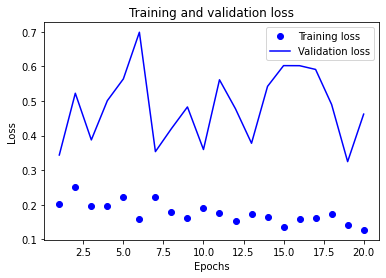

In [56]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

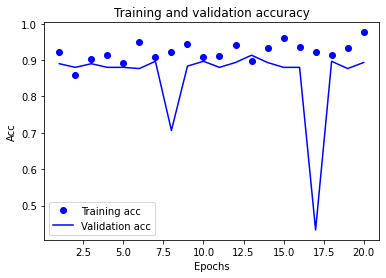

In [57]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()